In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import cross_val_score

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [24]:
names = ['A'+str(i) for i in range(1, 16)]
data = pd.read_table('./australian.dat', header=None, names=names, sep=' ')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
A1     690 non-null int64
A2     690 non-null float64
A3     690 non-null float64
A4     690 non-null int64
A5     690 non-null int64
A6     690 non-null int64
A7     690 non-null float64
A8     690 non-null int64
A9     690 non-null int64
A10    690 non-null int64
A11    690 non-null int64
A12    690 non-null int64
A13    690 non-null int64
A14    690 non-null int64
A15    690 non-null int64
dtypes: float64(3), int64(12)
memory usage: 80.9 KB


In [27]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [61]:
X = data[names[:-1]]
y = data[names[-1]]

X_train = X[:599]
y_train = y[:599]
X_test = X[600:]
y_test = y[600:]

In [63]:
scaler = StandardScaler()  
X_train = scaler.fit_transform(X_train)  
X_test = scaler.fit_transform(X_test)

In [64]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model_1.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

          0       0.90      0.85      0.87        52
          1       0.80      0.87      0.84        38

avg / total       0.86      0.86      0.86        90

[[44  8]
 [ 5 33]]


In [79]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 87.7778%
Log Loss: 0.9855136220270039
SVC
****Results****
Accuracy: 81.1111%
Log Loss: 0.36966554973180793
NuSVC
****Results****
Accuracy: 85.5556%
Log Loss: 0.3259898924177272
DecisionTreeClassifier
****Results****
Accuracy: 80.0000%
Log Loss: 6.907755278982136
RandomForestClassifier
****Results****
Accuracy: 84.4444%
Log Loss: 0.6778731428083639
AdaBoostClassifier
****Results****
Accuracy: 84.4444%
Log Loss: 0.6509606989304688
GradientBoostingClassifier
****Results****
Accuracy: 83.3333%
Log Loss: 0.32221605546141846
GaussianNB
****Results****
Accuracy: 77.7778%
Log Loss: 1.0938995531482887
LinearDiscriminantAnalysis
****Results****
Accuracy: 86.6667%
Log Loss: 0.35662788138311763
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 76.6667%
Log Loss: 1.1495601894254994


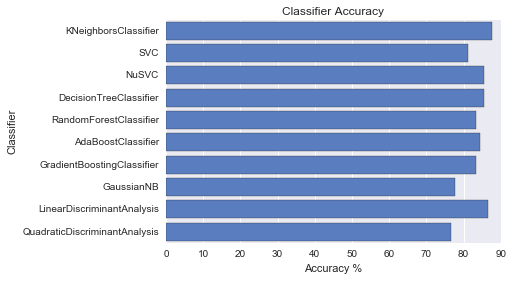

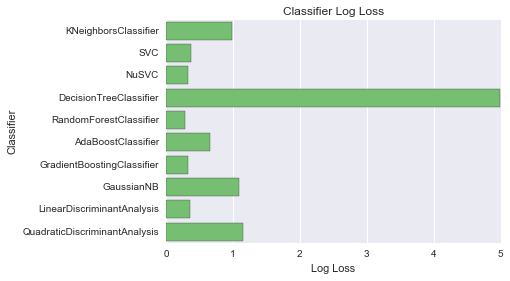

In [76]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

   如果只是要求准确率87%以上用KNeighborsClassifier即可达到要求，若还想继续提高精度
那么就需要集成学习了。